# Курс "Python для анализа данных"

---
#3.3.3 Решение некоторых задач математической статистики

## Где мы сейчас?


<html>
 <head>
  <meta charset="utf-8">
 </head>
 <body>
  <ul>
    <li>1. Введение в анализ данных и разработку на языке Python </li> <!-2.1->
    <li>2. Основы языка </li> <!-2.1->
    <li>3. <strong>Библиотеки NumPy и SciPy для решения задач анализа данных и машинного обучения</strong> <i><- Вот в этой главе!</i>
     <ul>
      <li>3.1 Математические дисциплины в анализе данных и машинном обучении</li>      
      <li>3.2 Основной объект NumPy ndarray</li>
      <li><strong>3.3 Библиотека SciPy</strong> <i><- Вот в этом параграфе!</i></li>
       <ul>
        <li>3.3.1 Обзор основных пакетов библиотеки SciPy</li>
        <li>3.3.2 Решение некоторых задач линейной алгебры</li>
        <li><strong>3.3.3 Решение некоторых задач математической статистики</strong><i> <- Вот в этом пункте!</i></li>
        <li>3.3.4 Решение некоторых задач математического анализа</li>
        <li>3.3.5 Решение специальных задач из области анализа данных и машинного обучения</li>
       </ul>
     </ul>
    </li>   
  </ul>
 </body>
</html>







## О чем будем говорить?


О базовых понятиях теории вероятностей и о методах модуля ```scipy.stats```, позволяющих решать задачи теории вероятностей и математической статистики.

**Краткое содержание занятия**:

**1. Основные распределения случайных величин, встречающихся в теории вероятностей**

   1.1 Определение функции плотности и функции распределения случайной величины. Построение графиков 
   
   1.2 Основные характеристики случайной величины: математическое ожидание, мода, медиана, дисперсия,        среднеквадратичное отклонение


**2. Элементы статистики**

   2.1 Выборка и ее характеристики. Построение гистограммы.
   
   2.2 Анализ одной выборки
   
   2.2.1 t-критерий Стьюдента для оценки вероятности того, что среднее по выборке равно теоретическому математическому ожиданию
       
   2.2.2 Критерий Колмогорова-Смирнова для оценки вероятности того, пренадлежит ли выборка определенному закону распределения
       
   2.2.3 Специальные тесты для нормального распределения
   
   2.3 Анализ двух выборок
   
   2.3.1 t-критерий Стьюдента для оценки вероятности того, что две выборки имеют идентичные средние
       
   2.3.2 Критерий Колмогорова-Смирнова для оценки вероятности того, что две выборки имеют идентичные средние

## Ключевые слова, понятия и выражения






*   случайная величина
*   функция плотности распределения
*   функция распределения
*   мода, медиана, математическое ожидание, дисперсия
*   статистический критерий

## Материал

### 1.Основные распределения случайных величин, встречающихся в теории вероятности
  
  
   

#### 1.1 Определение функции плотности и функции распределения случайной величины. Построение графиков

Подробно разберем на примере нормального распределения. Для остальных распределений оставим только короткие комментарии.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

* **Нормальное распределение**

Сгенерируем выборку из нормально распределённой случайной величины с параметрами среднего $\mu=0.0$ и среднеквадратичным отклонением $\sigma=1.0$:

In [ ]:
# инициализируем параметры
mu = 0.0
sigma = 1.0

# зададим нормально распределенную случайную величину
norm_rv = sts.norm(loc=mu, scale=sigma)

# сгенерируем 10 значений
norm_rv.rvs(size=10)

array([ 1.54815983,  1.37025461, -0.74125557, -0.57586   ,  0.07903781,
       -0.64706054, -1.22384372,  0.61888571,  2.03421504,  1.38379029])

Для нахождения значения функции распределения случайной величины в точке можно сделать так:

In [ ]:
# cdf() - функция распределения
norm_rv.cdf(0)

0.5

Теперь можно поточечно построить **функцию распределения**:

Text(0.5, 0, '$x$')

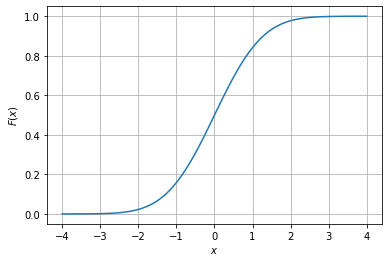

In [ ]:
# получаем массив из 100 аргументов x из отрезка [-4,4] и значений функции распределения
x = np.linspace(-4,4,100) # обратите внимание, что мы брали среднее равным 0.0
cdf = norm_rv.cdf(x) # функция может принимать и вектор (x)

# построим график 
plt.plot(x, cdf)
plt.ylabel('$F(x)$')
plt.grid()
plt.xlabel('$x$')

Построим график **функции плотности** вероятности:

Text(0.5, 0, '$x$')

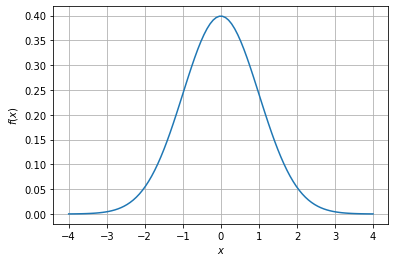

In [ ]:
x = np.linspace(-4,4,100)
pdf = norm_rv.pdf(x) # получаем значения функции плотности pdf()

plt.plot(x, pdf)
plt.grid()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

Напомним, что функция распределения и функция плотности связаны следующим соотношением:
$$F(x)=\int_{-\infty}^x f(t)dt$$
Быстро проверим это:

In [ ]:
# алгоритм подсчета определенного интеграла "на коленке"
def integral(f,a,b,dx=0.01):
    n=int((b-a)/dx)
    x=a
    sum=0.0
    for i in range(n):
        sum+=f(x)*dx
        x+=dx
    return sum

In [ ]:
# посчитаем интеграл для функции плотности от минус бесконечности ( -5 :) ) до x0
x0 = 5.0
print('Значение интеграла функции плотности: {}'.format(round(integral(norm_rv.pdf,-5,x0,0.01),2)))

# сравним со значением функции распределения
print('Значение функции распределения: {}'.format(round(norm_rv.cdf(x0),2)))

Значение интеграла функции плотности: 1.0
Значение функции распределения: 1.0


* **Равномерное распределение**

In [ ]:
# случайно выбираем точку на отрезке [1,4]
a = 1
b = 4

#обратите внимание, что в этой функции задается левая граница и масштаб, а не левая и правая границы:
uniform_rv = sts.uniform(a, b-a)

uniform_rv.rvs(10)

array([1.32016437, 1.30223435, 3.80482223, 2.11621822, 2.42075495,
       1.76061081, 1.77475011, 3.44021289, 1.19936194, 2.4299488 ])

Text(0.5, 0, '$x$')

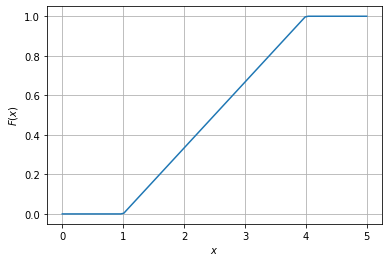

In [ ]:
# функция распределения
x = np.linspace(0,5,100)
cdf = uniform_rv.cdf(x)
plt.plot(x, cdf)

plt.grid()
plt.ylabel('$F(x)$')
plt.xlabel('$x$')

Text(0.5, 0, '$x$')

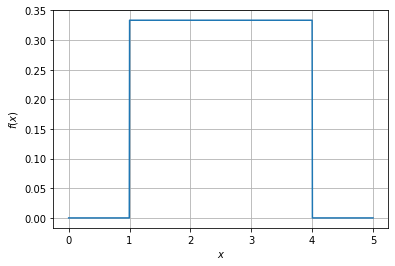

In [ ]:
# функция плотности
x = np.linspace(0,5,1000)
pdf = uniform_rv.pdf(x)

plt.grid()
plt.plot(x, pdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

* **Биномиальное распределение**

In [ ]:
# генерация 10 значений выборки,каждое из которых является числом успехов 
# в серии из 20 одинаковых независимых испытаний Бернулли 
# с вероятностью успеха 0.7 в каждом испытании
binomial_rv = sts.binom(20, 0.7)
binomial_rv.rvs(10)

array([16, 15, 15, 13, 15, 13, 16, 16, 13, 16])

Text(0.5, 0, '$x$')

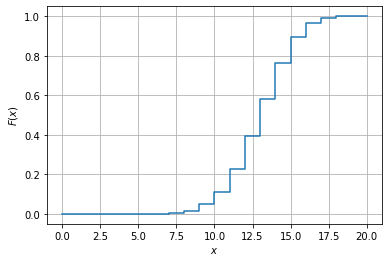

In [ ]:
# функция распределения
x = np.linspace(0,20,21)
cdf = binomial_rv.cdf(x)

plt.grid()
plt.step(x, cdf)
plt.ylabel('$F(x)$')
plt.xlabel('$x$')

Функция вероятности pmf() для дискретных случайных величин заменяет функцию плотности pdf():

Text(0.5, 0, '$x$')

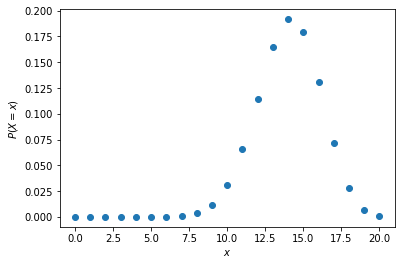

In [ ]:
x = np.linspace(0,20,21)
pmf = binomial_rv.pmf(x)
plt.plot(x, pmf, 'o')

plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')

* **Распределение Пуассона**

In [ ]:
# число событий, произошедших за фиксированное время, 
# при условии, что данные события происходят с некоторой фиксированной средней интенсивностью 
# и независимо друг от друга
poisson_rv = sts.poisson(5)
poisson_rv.rvs(10)

array([2, 4, 5, 6, 3, 5, 3, 4, 7, 6])

Text(0.5, 0, '$x$')

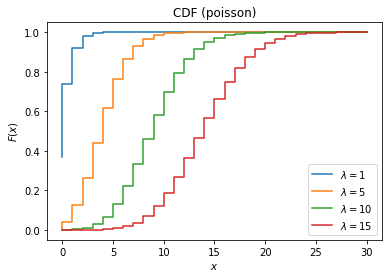

In [ ]:
# поизменяем значение параметра лямбда
x = np.linspace(0,30,31)
for l in [1, 5, 10, 15]:
    rv = sts.poisson(l)
    cdf = rv.cdf(x)
    plt.step(x, cdf, label="$\lambda=%s$" % l)
plt.legend()
plt.title("CDF (poisson)")

plt.ylabel('$F(x)$')
plt.xlabel('$x$')

Text(0.5, 0, '$x$')

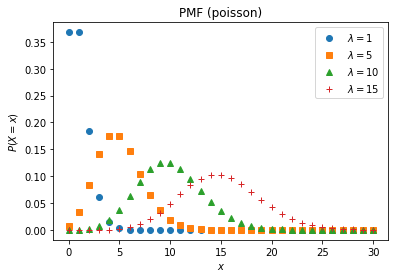

In [ ]:
x = np.linspace(0,30,31)

symbols = iter(['o', 's', '^', '+'])
for l in [1, 5, 10, 15]:
    rv = sts.poisson(l)
    pmf = rv.pmf(x)
    plt.plot(x, pmf, next(symbols), label="$\lambda=%s$" % l)
plt.legend()
plt.title("PMF (poisson)")

plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')

* **Распределение Хи-квадрат**

Text(0.5, 1.0, 'CDF ($\\chi^2_k$)')

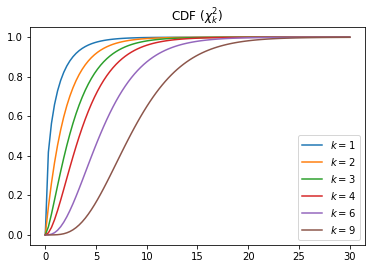

In [ ]:
# функция распределения
x = np.linspace(0,30,100)
for k in [1, 2, 3, 4, 6, 9]:
    rv = sts.chi2(k)
    cdf = rv.cdf(x)
    plt.plot(x, cdf, label="$k=%s$" % k)
plt.legend()
plt.title("CDF ($\chi^2_k$)")

Text(0.5, 1.0, 'PDF ($\\chi^2_k$)')

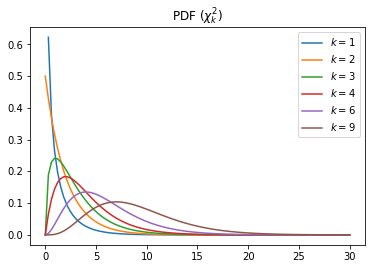

In [ ]:
# функция плотности
x = np.linspace(0,30,100)
for k in [1, 2, 3, 4, 6, 9]:
    rv = sts.chi2(k)
    pdf = rv.pdf(x)
    plt.plot(x, pdf, label="$k=%s$" % k)
plt.legend()
plt.title("PDF ($\chi^2_k$)")

#### 1.2 Основные характеристики случайной величины: математическое ожидание, мода, медиана, дисперсия,        среднеквадратичное отклонение

Разберем понятия **математического ожидания** и **среднеквадратичного отклонения** на примере нормального распределения, а именно, займемся их визуализацией на графике плотности.

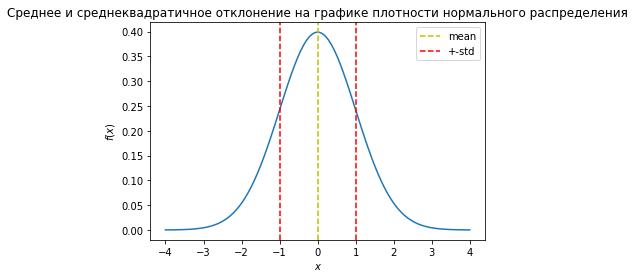

In [ ]:
x = np.linspace(-4,4,100)
pdf = norm_rv.pdf(x) # получаем значения функции плотности pdf()
plt.title("Среднее и среднеквадратичное отклонение на графике плотности нормального распределения")
plt.plot(x, pdf)
# отрисовываем среднее и отклонения от среднего на одну сигму
plt.axvline(x=norm_rv.mean(),color='y',linestyle='--',label='mean')
plt.axvline(x=norm_rv.mean()+norm_rv.std(),color='r',linestyle='--',label='+-std')
plt.axvline(x=norm_rv.mean()-norm_rv.std(),color='r',linestyle='--')

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend()

В случае нормального распределения среднее, медиана и мода совпадают, что не интересно. На примере распределения Хи-квадрат покажем, как могут располагаться указанные значения в более общем случае.

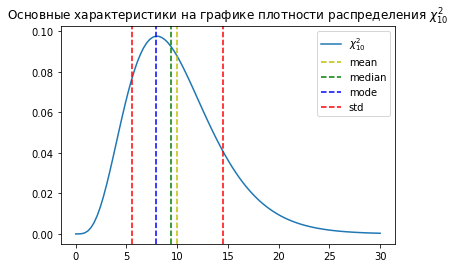

In [ ]:
# генерирум выборку
x = np.linspace(0,30,100)
chi2_rv= sts.chi2(10)
# строим график плотности
plt.title("Основные характеристики на графике плотности распределения $\chi^2_{10}$")
pdf = chi2_rv.pdf(x)
plt.plot(x, pdf,label='$\chi^2_{10}$')
# находим среднее
plt.axvline(x=chi2_rv.mean(),color='y',linestyle='--',label='mean')
# находим медиану
plt.axvline(x=chi2_rv.median(),color='g',linestyle='--',label='median')
# находим моду
plt.axvline(x=x[np.argmax(pdf)],color='b',linestyle='--',label='mode')
# определяем разброс от среднего в пределах одной сигмы
plt.axvline(x=chi2_rv.mean()+chi2_rv.std(),color='r',linestyle='--',label='std')
plt.axvline(x=chi2_rv.mean()-chi2_rv.std(),color='r',linestyle='--')
plt.legend()

### 2.Элементы статистики



#### 2.1 Выборка и ее характеристики. Построение гистограммы

Сгенерируем выборку объёма 100 из стандартного нормального распределения (с $\mu=0$ и $\sigma^2=1$):

In [ ]:
norm_rv = sts.norm(0, 1)
sample = norm_rv.rvs(100)

Построим эмпирическую функцию распределения для полученной выборки:

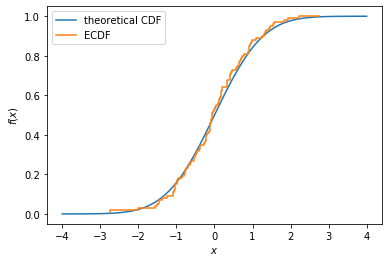

In [ ]:
x = np.linspace(-4,4,100)
cdf = norm_rv.cdf(x)
plt.plot(x, cdf, label='theoretical CDF')

# для построения ECDF используем библиотеку statsmodels
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='ECDF')

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')

Построим гистограмму:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


Text(0.5, 0, '$x$')

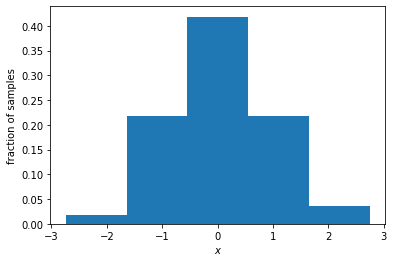

In [ ]:
# важно угадать с параметром bins - количество интервалов,
# на которые разбивается выборка для подсчета частот элементов
plt.hist(sample,bins=5,normed=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Для получения "гладкой" функции плотности можно воспользоваться ядерным сглаживанием:

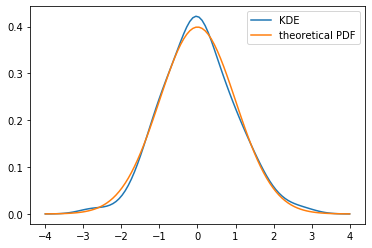

In [ ]:
# сглаживание
kde = sts.gaussian_kde(sample)
plt.plot(x,kde(x),label='KDE')

# построение теоретической функции плотности
pdf=norm_rv.pdf(x)
plt.plot(x, pdf, label='theoretical PDF')

plt.legend()

#### 2.2 Анализ одной выборки

    

##### 2.2.1 t-критерий Стьюдента для оценки вероятности того, что среднее по выборке равно теоретическому математическому ожиданию

Сгенерируем выборку из нормального распределения и сравним теоретические и выборочные параметры:

In [ ]:
# генерируем выборку
x = sts.norm.rvs(0.0,1.0, size=1000)

In [ ]:
# получим теоретические параметры
# mvsk = mean, variance, skew(скошенность), kurtosis(эксцесс)
m, v,s, k = sts.norm.stats(0.0,1.0,moments='mvsk')

In [ ]:
# получим параметры выборки
n, (smin, smax), sm, sv, ss, sk = sts.describe(x)
# !Важно: describe() использует несмещенную оценку для дисперсии

In [ ]:
# сравним полученные результаты
sstr = '%-14s mean = %6.4f, variance = %6.4f, skew = %6.4f, kurtosis = %6.4f'
print(sstr % ('distribution:', m, v, s ,k))
print(sstr % ('sample:', sm, sv, ss, sk))

distribution:  mean = 0.0000, variance = 1.0000, skew = 0.0000, kurtosis = 0.0000
sample:        mean = 0.0123, variance = 0.9580, skew = 0.0636, kurtosis = -0.0257


Для проверки нулевой гипотезы $H_0:E(X)=m$, т.е. оценки вероятности того, что среднее по выборке равно теоретическому математическому ожиданию, используется t-критерий Стъюдента:

In [ ]:
print('t-statistic = %6.3f pvalue = %6.4f' %  sts.ttest_1samp(x, m))

t-statistic =  0.397 pvalue = 0.6914


Значение $p = 0,83$ означает вероятность ошибки отвержения нулевой гипотезы (т.е. с вероятностью 0,83 мы ошибемся, если скажем, что выборка не подчиняется закону нормального распределения)

##### 2.2.2 Критерий Колмогорова-Смирнова для оценки вероятности того, пренадлежит ли выборка определенному закону распределения

Тест Колмогорова-Смирнова может быть использован для проверки нулевой гипотезы: выборка подчиняется закону  нормального распределения

In [ ]:
print('KS-statistic D = %6.3f pvalue = %6.4f' % sts.kstest(x,'norm',(0.0,)))

KS-statistic D =  0.015 pvalue = 0.9826


##### 2.2.3 Специальные тесты для нормального распределения

Поскольку нормальное распределение является наиболее распространенным распределением в статистике, существует несколько дополнительных функций, позволяющих проверить принадлежность выборки к нормальному распределению. Прежде всего, можно проверить, отличаются ли скос и эксцесс нашей выборки от нормального распределения: 

In [ ]:
print('normal skewtest teststat = %6.3f pvalue = %6.4f' % sts.skewtest(x))
print('normal kurtosistest teststat = %6.3f pvalue = %6.4f' % sts.kurtosistest(x))

normal skewtest teststat =  0.826 pvalue = 0.4089
normal kurtosistest teststat = -0.056 pvalue = 0.9555


Эти два теста объединяются в тест на нормальность выборки 

In [ ]:
print('normaltest teststat = %6.3f pvalue = %6.4f' % sts.normaltest(x))

normaltest teststat =  0.685 pvalue = 0.7100


Если  p-value очень низкое, то следует отклонить гипотезу о том, что наша выборка имеет скос и эксцесс нормального распределения.

#### 2.3 Анализ двух выборок

##### 2.3.1 t-критерий Стьюдента для оценки вероятности того, что две выборки имеют идентичные средние

Пусть имеются две выборки, которые могут иметь одинаковые распределения. Проверим, имеют ли эти выборки одинаковые статистические свойства. 

In [ ]:
# Испытание с выборок с идентичными средними 
rvs1 = sts.norm.rvs(loc=5, scale=10, size=500)
rvs2 = sts.norm.rvs(loc=5, scale=10, size=500)
sts.ttest_ind(rvs1, rvs2)

Ttest_indResult(statistic=-0.1855814634468461, pvalue=0.852810700943327)

In [ ]:
# Испытание выборок с различными средними
rvs3 = sts.norm.rvs(loc=8, scale=10, size=500)
sts.ttest_ind(rvs1, rvs3)

Ttest_indResult(statistic=-5.8406654471375825, pvalue=7.029796027072606e-09)

##### 2.3.2 Критерий Колмогорова-Смирнова для оценки вероятности того, что две выборки имеют идентичные средние

In [ ]:
# В первом примере предыдущего пункта, где обе выборки имеют одинаковые распределения, 
# мы не можем отклонить нулевую гипотезу, поскольку p-value достаточно высоко.
sts.ks_2samp(rvs1, rvs2)

Ks_2sampResult(statistic=0.04, pvalue=0.8191511303355717)

In [ ]:
# Во втором примере мы можем отклонить нулевую гипотезу, так как p-value меньше 1% 
sts.ks_2samp(rvs1, rvs3)

Ks_2sampResult(statistic=0.182, pvalue=1.1893503543157425e-07)

## Дополнительные материалы и литература



*   https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html